This final project is about movies.

Name: Dam Thi Yen Nhi
ID: 202201116
Course: Computer Programming with Python.

Based on my chosen dataset.
a, I want to see the correlation between budget,revenue,popularity,vote, and runtime.
b, How many movies was released each year?
c, what is the top 5 years that most movies are released?
d, Is there any correlation between budget and revenue? I guess there is!
e, what is the relationship between budget and revenue on the year fof 2017 to 2022?
f, what is the top 10 most common language used in movies? and how many each of them?
g, what is the profit?
h, what is the most common genres?
i, what is the average value for each genres?
k, what is the return on investment of movies, ( top 10 most common languages only)?



the answers for all above questions i will use the comment# to add the answers after seeing the result from my code.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = 'movies.csv'

df = pd.read_csv(path)
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


In [2]:
df.columns = df.columns.str.strip()
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')

In [3]:
df.drop(['overview','production_companies','tagline','credits','keywords', 'poster_path', 'backdrop_path', 'recommendations'], inplace=True, axis=1)
df.head()

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,2023-08-02,129000000.0,352056482.0,116.0,Released,7.079,1365.0
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,2023-04-05,18000000.0,65675816.0,103.0,Released,7.433,545.0
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,2023-06-06,200000000.0,407045464.0,127.0,Released,7.340,1007.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,4742.163,2024-02-27,190000000.0,683813734.0,167.0,Released,8.300,2770.0


In [4]:
df.isna().sum()
# the data for some budget, revenue, popularity, vote are most important for me on this reseach and there is no missing data, which is really good
# the missing value in release_date and runtime will not cause problems for me on this research, but the missing data from genres might be.

id                        0
title                     6
genres               210444
original_language         0
popularity                0
release_date          51775
budget                    0
revenue                   0
runtime               34358
status                    0
vote_average              0
vote_count                0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722440 entries, 0 to 722439
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 722440 non-null  int64  
 1   title              722434 non-null  object 
 2   genres             511996 non-null  object 
 3   original_language  722440 non-null  object 
 4   popularity         722440 non-null  float64
 5   release_date       670665 non-null  object 
 6   budget             722440 non-null  float64
 7   revenue            722440 non-null  float64
 8   runtime            688082 non-null  float64
 9   status             722440 non-null  object 
 10  vote_average       722440 non-null  float64
 11  vote_count         722440 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 66.1+ MB


In [6]:
rows,cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 722440
Number of columns: 12


In [7]:
df.dtypes

id                     int64
title                 object
genres                object
original_language     object
popularity           float64
release_date          object
budget               float64
revenue              float64
runtime              float64
status                object
vote_average         float64
vote_count           float64
dtype: object

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,2023-08-02,129000000.0,352056482.0,116.0,Released,7.079,1365.0
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,2023-04-05,18000000.0,65675816.0,103.0,Released,7.433,545.0
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,2023-06-06,200000000.0,407045464.0,127.0,Released,7.340,1007.0
4,693134,Dune: Part Two,Science Fiction-Adventure,en,4742.163,2024-02-27,190000000.0,683813734.0,167.0,Released,8.300,2770.0


In [9]:
df.info()
# now release_date column turn to datetime64, not an object anymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722440 entries, 0 to 722439
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 722440 non-null  int64         
 1   title              722434 non-null  object        
 2   genres             511996 non-null  object        
 3   original_language  722440 non-null  object        
 4   popularity         722440 non-null  float64       
 5   release_date       670665 non-null  datetime64[ns]
 6   budget             722440 non-null  float64       
 7   revenue            722440 non-null  float64       
 8   runtime            688082 non-null  float64       
 9   status             722440 non-null  object        
 10  vote_average       722440 non-null  float64       
 11  vote_count         722440 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 66.1+ MB


In [10]:
df.describe()
# to see some important statistical numbers

,id,popularity,release_date,budget,revenue,runtime,vote_average,vote_count
count,722440.00000,722440.000000,670665,7.224400e+05,7.224400e+05,6.880820e+05,722440.000000,722440.000000
mean,526915.02488,1.885933,1997-01-07 06:27:33.853414272,4.003249e+05,9.965903e+05,1.990439e+02,2.445572,28.155992
min,2.00000,0.000000,1874-12-09 00:00:00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,328915.75000,0.600000,1984-01-01 00:00:00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,533350.00000,0.600000,2009-01-01 00:00:00,0.000000e+00,0.000000e+00,5.000000e+01,0.000000,0.000000
75%,737849.25000,1.301000,2017-06-01 00:00:00,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,968161.00000,10484.676000,2049-01-01 00:00:00,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000
std,253190.40607,24.740227,NaN,8.196129e+06,2.034274e+07,8.583634e+04,3.176289,390.829479


In [11]:
#What is the average value of the budget
df['budget'].mean().round(2)

400324.91

In [12]:
#What is the average value of the revenue
df['revenue'].mean().round(2)

# so the average revenue is about twice more than averagae budget

996590.3

In [13]:
# what is the average runtime
df['runtime'].mean().round(2)



199.04

In [14]:
# top 10 most common languages
df['original_language'].value_counts().head(10)

# english are the most common languages , which is easy to guess.

original_language
en    379083
fr     44803
es     42382
de     37074
ja     27681
pt     20442
ru     17567
it     17250
zh     16716
ko      9460
Name: count, dtype: int64

In [15]:
df['profit'] = df['revenue'] - df['budget']

print(df[['title', 'budget', 'revenue', 'profit']].head())

# adding the profit columns here.

                              title       budget      revenue       profit
0   Godzilla x Kong: The New Empire  150000000.0  558503759.0  408503759.0
1                 Meg 2: The Trench  129000000.0  352056482.0  223056482.0
2               The Pope's Exorcist   18000000.0   65675816.0   47675816.0
3  Transformers: Rise of the Beasts  200000000.0  407045464.0  207045464.0
4                    Dune: Part Two  190000000.0  683813734.0  493813734.0


In [16]:
# i want to see the revenue of my favorite movies, and the result is pretty high
df[df['title']=='Forrest Gump']['revenue']

1046    677387716.0
Name: revenue, dtype: float64

In [40]:

a=df['revenue'].max()
print(f'Highest sale: {a}')

Highest sale: 2920357254.0


In [18]:
# number of movies which are in english
sum(df['original_language']=='en')

379083

In [19]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'popularity',
       'release_date', 'budget', 'revenue', 'runtime', 'status',
       'vote_average', 'vote_count', 'profit'],
      dtype='object')

In [20]:
#i want to check the exact correlation number
correlation =df['budget'].corr(df['revenue'])
correlation

0.4982206578919326

In [21]:
df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()
# by this df i can see the general correlation between each catergories. 

,budget,revenue,popularity,vote_average,vote_count,runtime
budget,1.000000,0.498221,0.143032,0.055974,0.435642,-0.000050
revenue,0.498221,1.000000,0.178632,0.066098,0.768190,-0.000048
popularity,0.143032,0.178632,1.000000,0.055292,0.140514,-0.000064
vote_average,0.055974,0.066098,0.055292,1.000000,0.099778,-0.001180
vote_count,0.435642,0.768190,0.140514,0.099778,1.000000,-0.000076
runtime,-0.000050,-0.000048,-0.000064,-0.001180,-0.000076,1.000000


<Axes: >

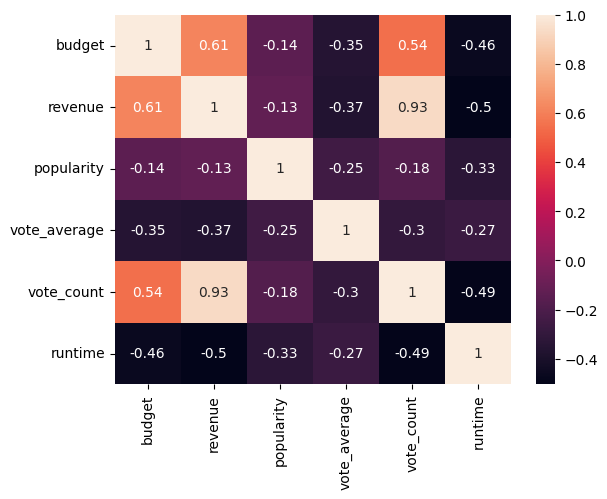

In [22]:
# which of the below category has the positive relationship with each other the most?
c=df[['budget', 'revenue', 'popularity','vote_average', 'vote_count','runtime']].corr()
sns.heatmap(c.corr(), annot=True)
# i thought the revenue and budget will have the most positive correlation but it was
# actually between revenue and vote_count with 0.93, this is an interesting aspect that i have not think about.
#the correlation between budget and revenue is only 0.61, which is not really good


C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\3453554080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['release_date'].dt.month
C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\3453554080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['release_date'].dt.year


<Axes: xlabel='year', ylabel='month'>

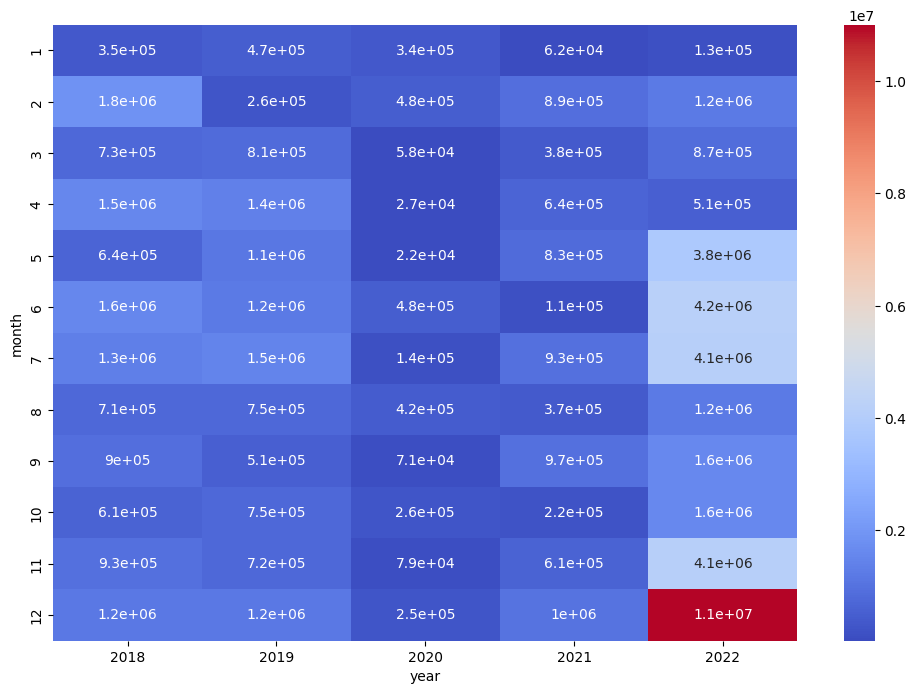

In [23]:
df_filtered = df[(df['release_date'].dt.year >= 2018) & (df['release_date'].dt.year <= 2022)]


df_filtered['month'] = df_filtered['release_date'].dt.month
df_filtered['year'] = df_filtered['release_date'].dt.year


pv = df_filtered.pivot_table(values='revenue', index='month', columns='year')


plt.figure(figsize=(12, 8))
sns.heatmap(pv, cmap='coolwarm', annot=True)

# by looking at the heatmap i can see that in the year 2020 the revenue is smallest, and the biggest reason is probaly due to covid and lockdown time.

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\2161131740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['release_year'] = df_filtered['release_date'].dt.year


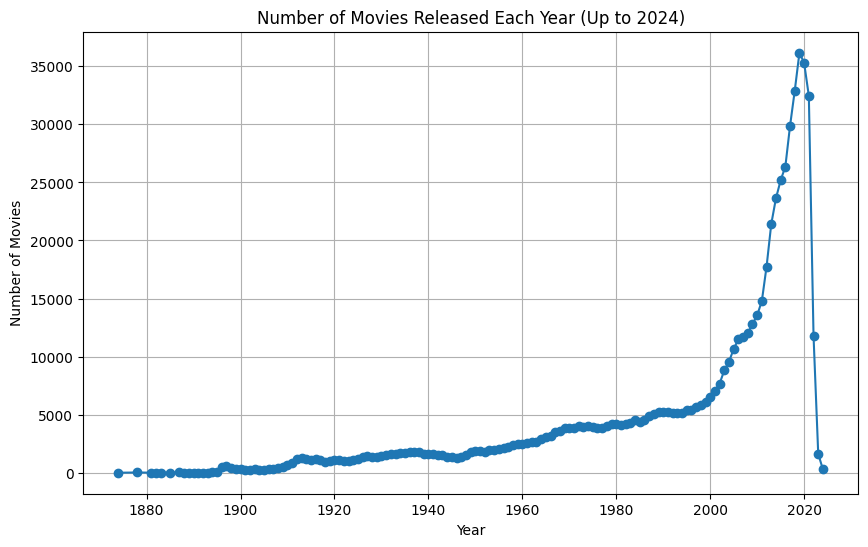

In [24]:
df_filtered = df[df['release_date'].dt.year <= 2024]
df_filtered['release_year'] = df_filtered['release_date'].dt.year

movies_per_year = df_filtered['release_year'].value_counts().sort_index()

# Plotting the distribution of movies released over the years
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released Each Year (Up to 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# the number of movies produce after since 21th century growing at a very fast rate, since the development of economic, technology, transportation, communication, and so on.

In [25]:
movies_per_year = df_filtered['release_year'].value_counts().sort_index()


top_5_years = movies_per_year.nlargest(5)
top_5_years

# from this finding i think that i should do more analytics about this period, from 2017 to 2022

release_year
2019    36166
2020    35290
2018    32892
2021    32445
2017    29867
Name: count, dtype: int64

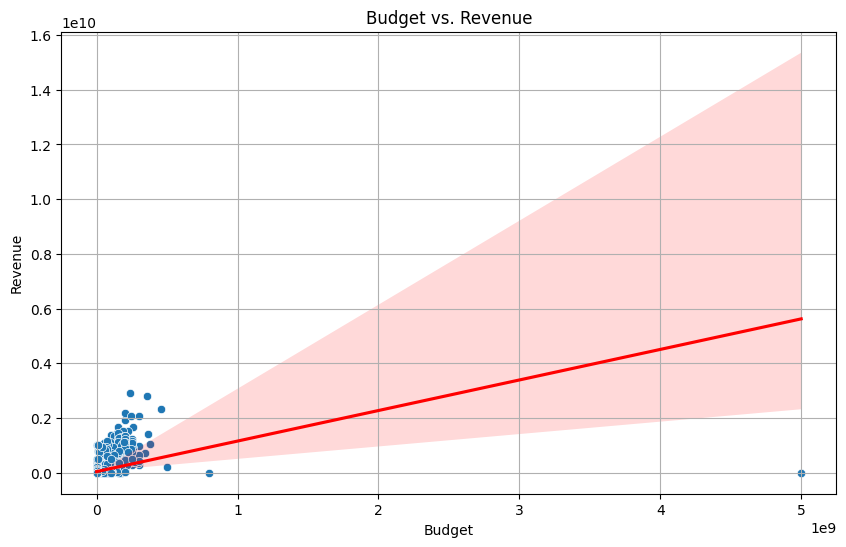

In [26]:

df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_filtered)
sns.regplot(x='budget', y='revenue', data=df_filtered, scatter=False, color='red')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

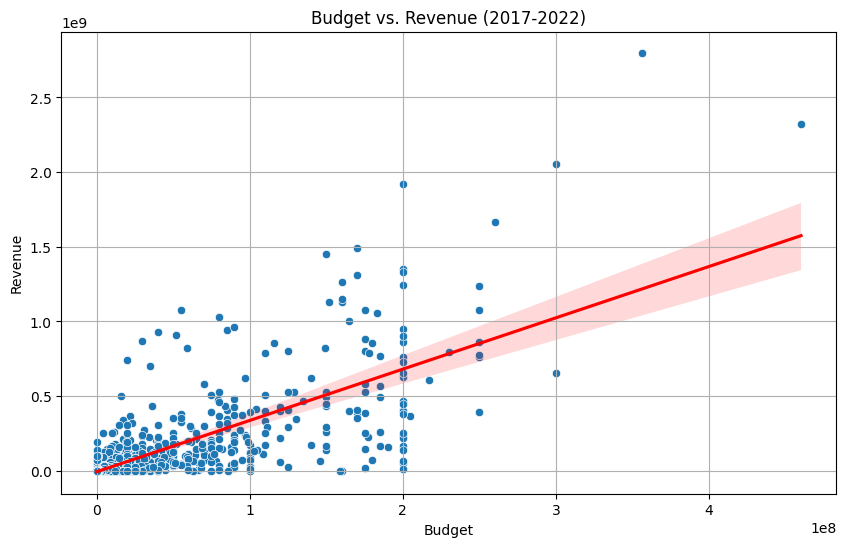

In [27]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

df_filtered = df[(df['year'] >= 2017) & (df['year'] <= 2022) & (df['budget'] > 0) & (df['revenue'] > 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot( df_filtered, x='budget', y='revenue')
sns.regplot(df_filtered,x='budget', y='revenue', scatter=False, color='red')
plt.title('Budget vs. Revenue (2017-2022)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# by looking at the relationship between budget and revenue from the year 2017 to 2022 , i can see that they have a pretty good positive correlation.
# higher budget seems to get higher revenue.

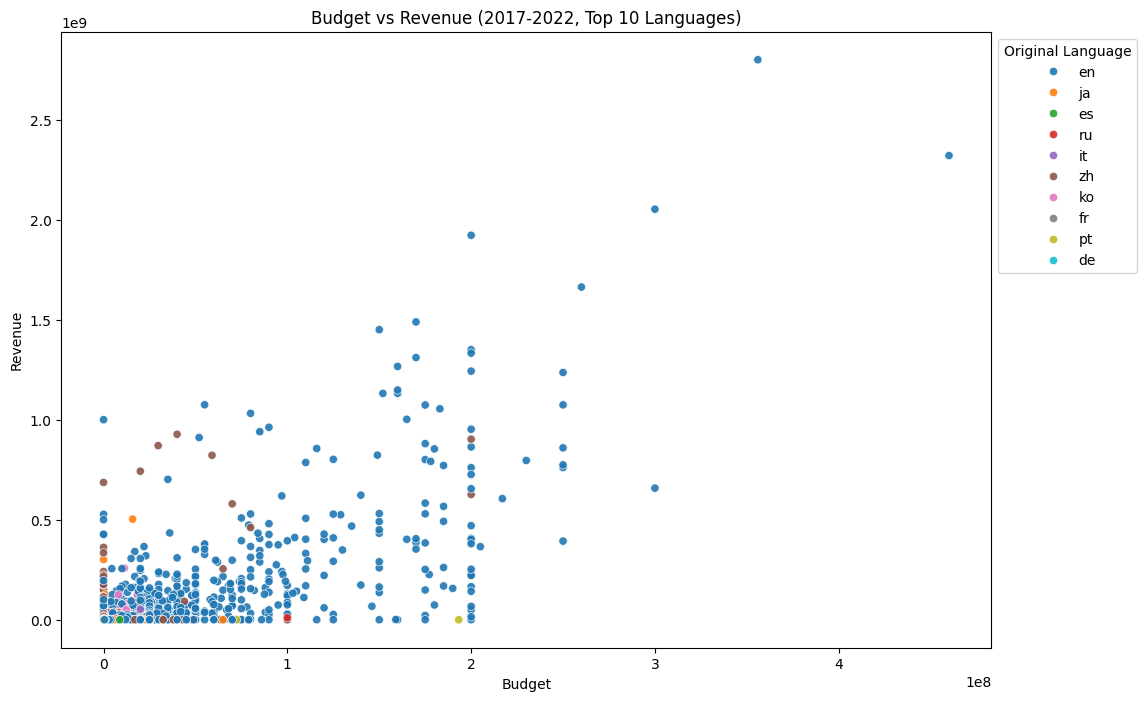

In [43]:

filtered_df = df[(df['year'] >= 2017) & (df['year'] <= 2022)]


top_languages = filtered_df['original_language'].value_counts().nlargest(10).index.tolist()


filtered_df = filtered_df[filtered_df['original_language'].isin(top_languages)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='budget', y='revenue', hue='original_language', alpha=0.9)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue (2017-2022, Top 10 Languages)')
plt.legend(title='Original Language', bbox_to_anchor=(1, 1))
plt.show()

#

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\1857179632.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_by_decade.index, y=movies_by_decade.values, palette='viridis')


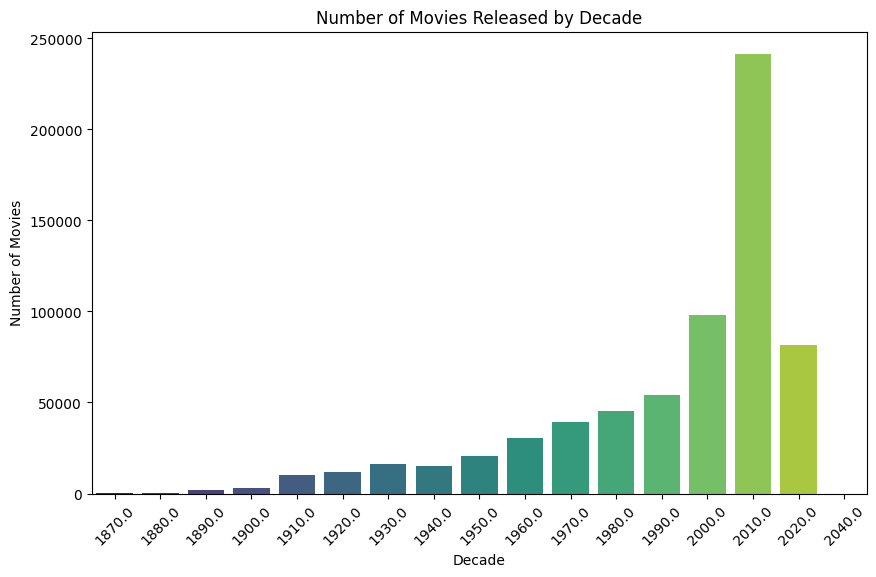

In [31]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Calculate the decade
df['decade'] = (df['year'] // 10) * 10

movies_by_decade = df['decade'].value_counts().sort_index()


most_popular_decade = movies_by_decade.idxmax()
most_popular_decade_count = movies_by_decade.max()

plt.figure(figsize=(10, 6))
sns.barplot(x=movies_by_decade.index, y=movies_by_decade.values, palette='viridis')
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# 2010s released the most movies ever

In [30]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'popularity',
       'release_date', 'budget', 'revenue', 'runtime', 'status',
       'vote_average', 'vote_count', 'profit', 'year'],
      dtype='object')

<Axes: xlabel='original_language'>

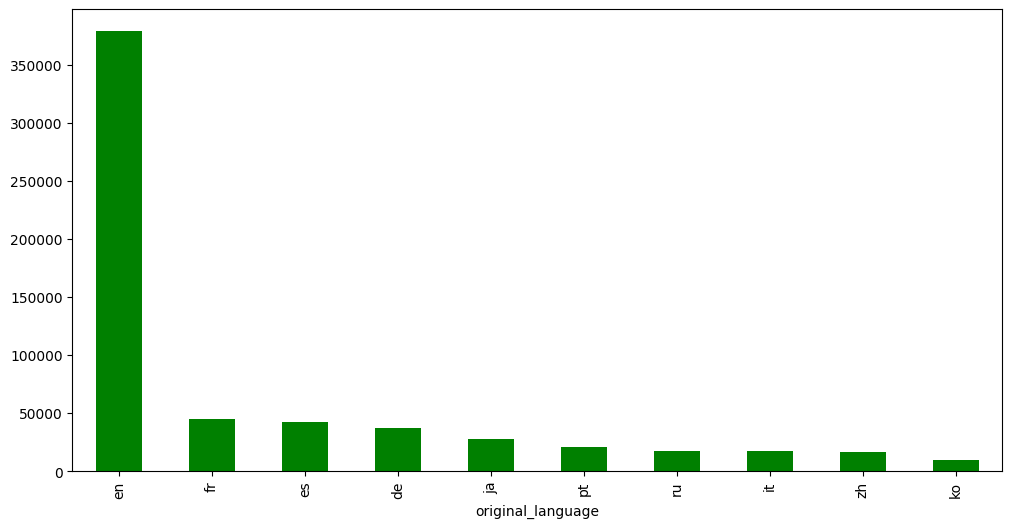

In [32]:
language_distribution = df['original_language'].value_counts().head(10)

# Plot the distribution using a bar plot
plt.figure(figsize=(12, 6))
language_distribution.plot(kind='bar', color='green')

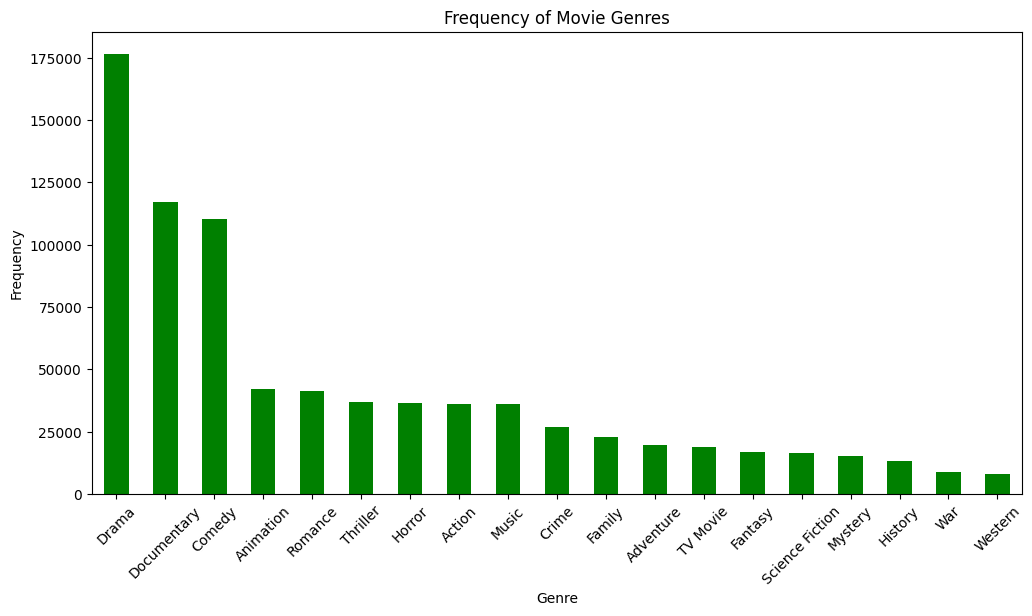

In [39]:
# what is the most common genre?
genre_counts = df['genres'].str.split('-', expand=True).stack().value_counts()


plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='green')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# drama, documentary and comedi are the most common genres, now lets see the average value of each genres

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\3506711737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(genre_revenue,x='revenue', y='genre', palette='viridis')


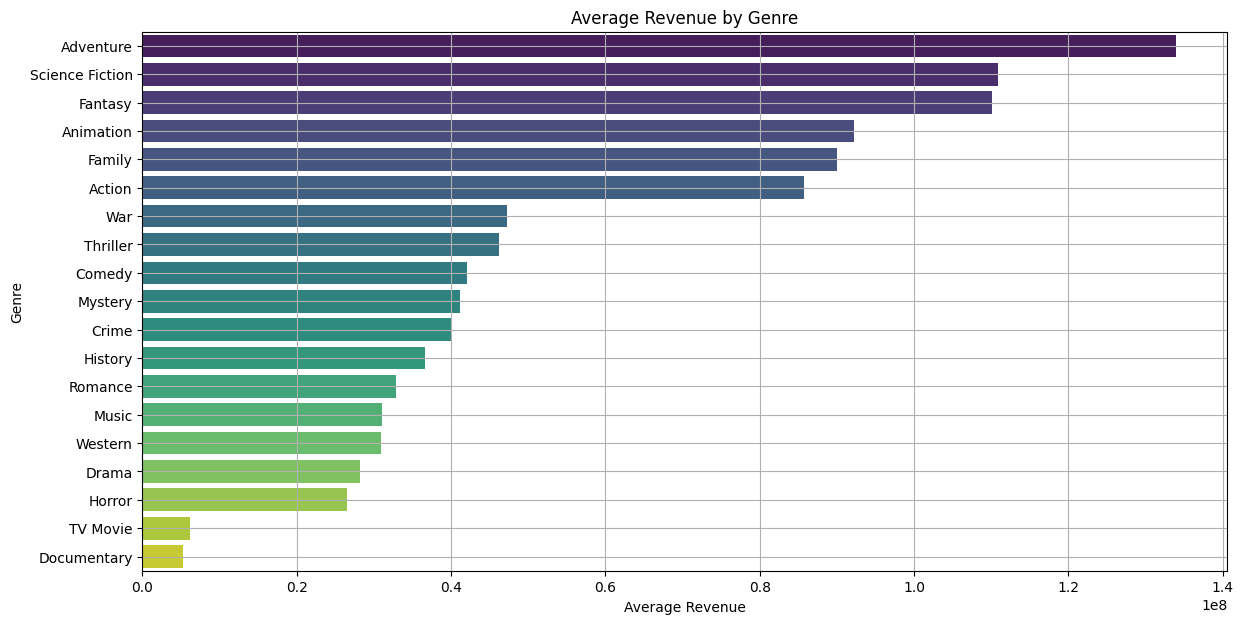

In [34]:
df_g = df[df['revenue'] > 0]

# Split genres into separate rows
df_genres = df_g['genres'].str.split('-', expand=True).stack().reset_index(level=1, drop=True)
df_genres.name = 'genre'
df_genres = df_g.drop('genres', axis=1).join(df_genres)

genre_revenue = df_genres.groupby('genre')['revenue'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(14, 7))
sns.barplot(genre_revenue,x='revenue', y='genre', palette='viridis')
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


# even though the most common genres are drama, documentary and comedi, the adventure and science fiction have the highest average revenue.
#  and documentary is even at the bottom of the list

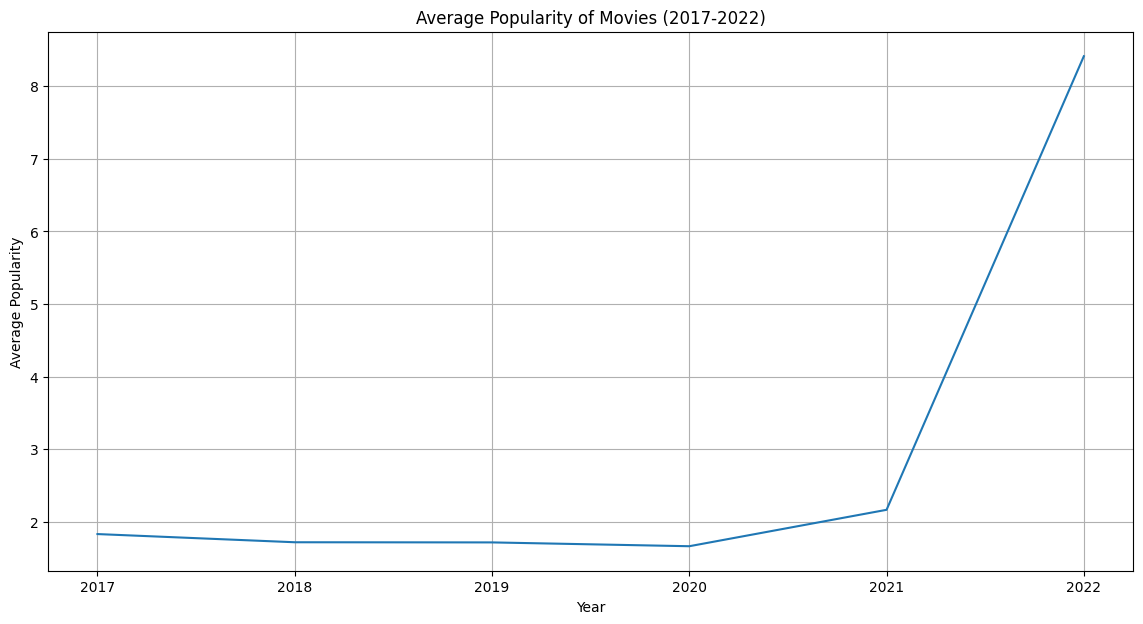

In [35]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year


df_filtered = df[(df['year'] >= 2017) & (df['year'] <= 2022)]

# Group by year and calculate the average popularity for each year
popularity_over_time_filtered = df_filtered.groupby('year')['popularity'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='popularity', data=popularity_over_time_filtered)
plt.title('Average Popularity of Movies (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

# the popularity of movies increase over time

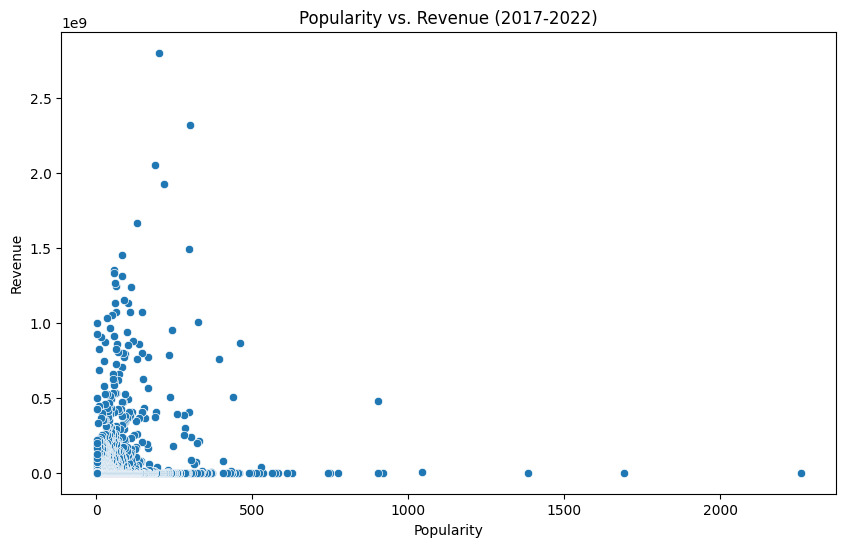

In [36]:
p = df[(df['release_date'].dt.year >= 2017) & (df['release_date'].dt.year <= 2022)]

# Drop rows with missing values for popularity and revenue
po = p.dropna(subset=['popularity', 'revenue'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(po,x='popularity', y='revenue')
plt.title('Popularity vs. Revenue (2017-2022)')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()
# oh look at the graph it is not really correlated to each other!, some movie are so popular but the revenue is low
# and some movies have high revenue but the popularity is very low.

In [37]:

# Calculate correlation coefficient
correlation = po['popularity'].corr(po['revenue'])
correlation

0.220559840615214

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_588\1726803090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['roi'] = (df_filtered['revenue'] - df_filtered['budget']) / df_filtered['budget']


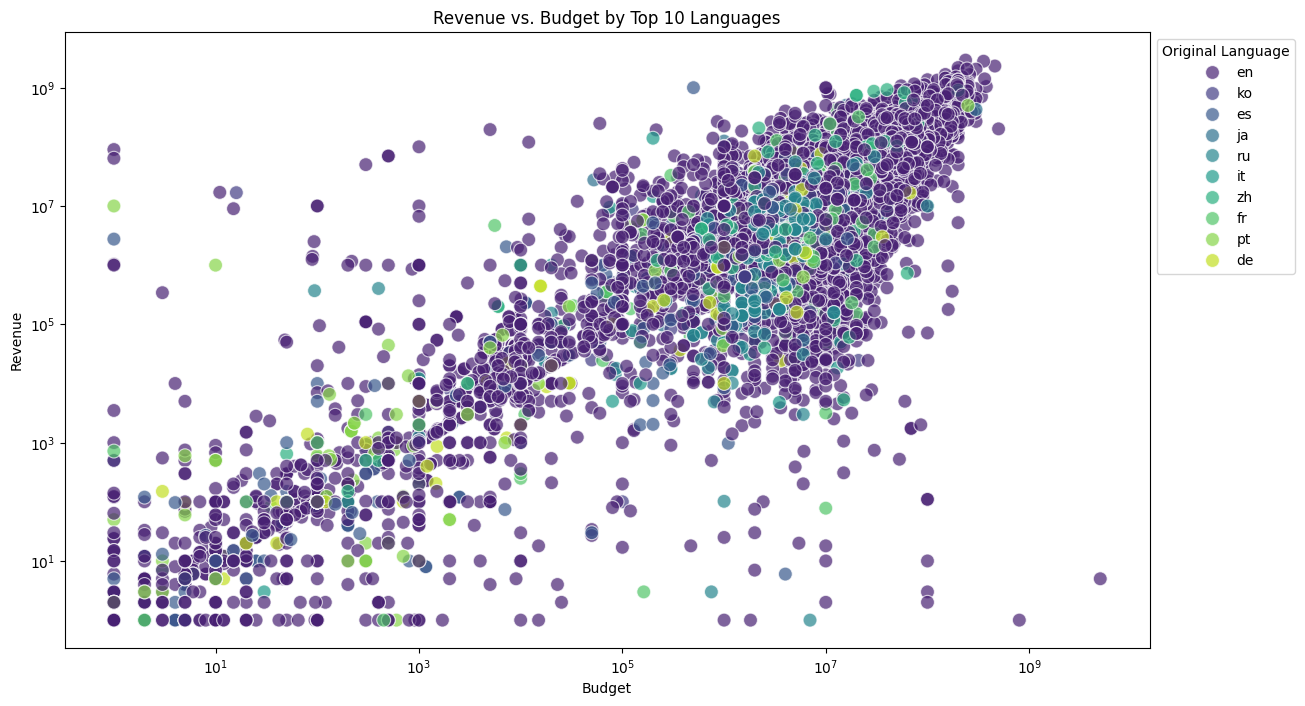

In [38]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['original_language'] = df['original_language'].astype(str)

top_languages = df['original_language'].value_counts().nlargest(10).index.tolist()
df_filtered = df[df['original_language'].isin(top_languages)]

# this is return on investment. ROI
df_filtered['roi'] = (df_filtered['revenue'] - df_filtered['budget']) / df_filtered['budget']


plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_filtered, x='budget', y='revenue', hue='original_language', palette='viridis', s=100, alpha=0.7)
plt.title('Revenue vs. Budget by Top 10 Languages')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.legend(title='Original Language', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



Each point on the scatter plot represents a movie.
There is a general positive correlation between budget and revenue, indicating that movies with higher budgets tend to generate higher revenues
The majority of the movies in the dataset are in English (en).
Other languages like Korean (ko), Spanish (es), Japanese (ja), Russian (ru), Italian (it), Chinese (zh), French (fr), Portuguese (pt), and German (de) are represented by fewer data points.
Some movies with low budgets have really high revenues, seen as points in the lower-middle of the plot that are high on the y-axis.
Conversely, some movies with high budgets have relatively low revenues, visible in the upper-left region of the plot.